In [1]:
raw_data= open('9.txt').read()
raw_data

' \nAs of March 2022, India had reportedly sent $1547.80 million in international transactions. Of this volume, travel and education dominated the cause (among others) as the world springs back to pre-COVID-19 times.Banks, money exchangers, some travel agencies, and some non-banking financial organisations (NBFCs) have typically helped Indians send money abroad. But these legacy channels may not always prove reliable.This is where new-age international money transfer apps come into the picture. They’re swift, easy to use, reliable, safe, and, above all, cost-effective. The best international money transfer app on the market could allow you to send money abroad without any hassle.The article will guide you through the best international money transfer app in India that you can use from the comfort of your mobile phone or tablet.How to Transfer Money Internationally Online?Sending money abroad, also called outward remittance, is critical to many people in India. However, sending money ab

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix

In [3]:
data=pd.Series(raw_data)

In [4]:
data

0     \nAs of March 2022, India had reportedly sent...
dtype: object

In [5]:
data_processed= data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0     as of march india had reportedly sent million...
dtype: object

In [6]:
stop_words= stopwords.words('english')

In [7]:
from nltk import word_tokenize

In [8]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)>2]))

In [9]:
data_final

0    march india reportedly sent million internatio...
dtype: object

In [10]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common()

[('money', 41),
 ('transfer', 29),
 ('fees', 20),
 ('exchange', 18),
 ('rates', 16),
 ('offers', 14),
 ('bank', 13),
 ('international', 12),
 ('pay', 12),
 ('india', 11),
 ('app', 11),
 ('options', 11),
 ('also', 9),
 ('service', 9),
 ('transactions', 8),
 ('many', 8),
 ('transfers', 8),
 ('hidden', 8),
 ('support', 8),
 ('countries', 8),
 ('abroad', 7),
 ('sending', 7),
 ('charges', 7),
 ('cash', 7),
 ('apps', 6),
 ('best', 6),
 ('available', 6),
 ('customer', 6),
 ('supported', 6),
 ('transparent', 6),
 ('may', 5),
 ('use', 5),
 ('mobile', 5),
 ('credit', 5),
 ('well', 5),
 ('rate', 5),
 ('high', 5),
 ('days', 5),
 ('currencies', 5),
 ('origin', 5),
 ('limited', 5),
 ('sent', 4),
 ('world', 4),
 ('banks', 4),
 ('non', 4),
 ('expensive', 4),
 ('different', 4),
 ('fast', 4),
 ('option', 4),
 ('take', 4),
 ('website', 4),
 ('california', 4),
 ('amount', 4),
 ('low', 4),
 ('vary', 4),
 ('depending', 4),
 ('number', 4),
 ('typically', 3),
 ('send', 3),
 ('reliable', 3),
 ('easy', 3),
 ('w

In [11]:
words_list

['march',
 'india',
 'reportedly',
 'sent',
 'million',
 'international',
 'transactions',
 'volume',
 'travel',
 'education',
 'dominated',
 'cause',
 'among',
 'others',
 'world',
 'springs',
 'back',
 'pre',
 'covid',
 'times',
 'banks',
 'money',
 'exchangers',
 'travel',
 'agencies',
 'non',
 'banking',
 'financial',
 'organisations',
 'nbfcs',
 'typically',
 'helped',
 'indians',
 'send',
 'money',
 'abroad',
 'legacy',
 'channels',
 'may',
 'always',
 'prove',
 'reliable',
 'new',
 'age',
 'international',
 'money',
 'transfer',
 'apps',
 'come',
 'picture',
 'swift',
 'easy',
 'use',
 'reliable',
 'safe',
 'cost',
 'effective',
 'best',
 'international',
 'money',
 'transfer',
 'app',
 'market',
 'could',
 'allow',
 'send',
 'money',
 'abroad',
 'without',
 'hassle',
 'article',
 'guide',
 'best',
 'international',
 'money',
 'transfer',
 'app',
 'india',
 'use',
 'comfort',
 'mobile',
 'phone',
 'tablet',
 'transfer',
 'money',
 'internationally',
 'online',
 'sending',
 'mone

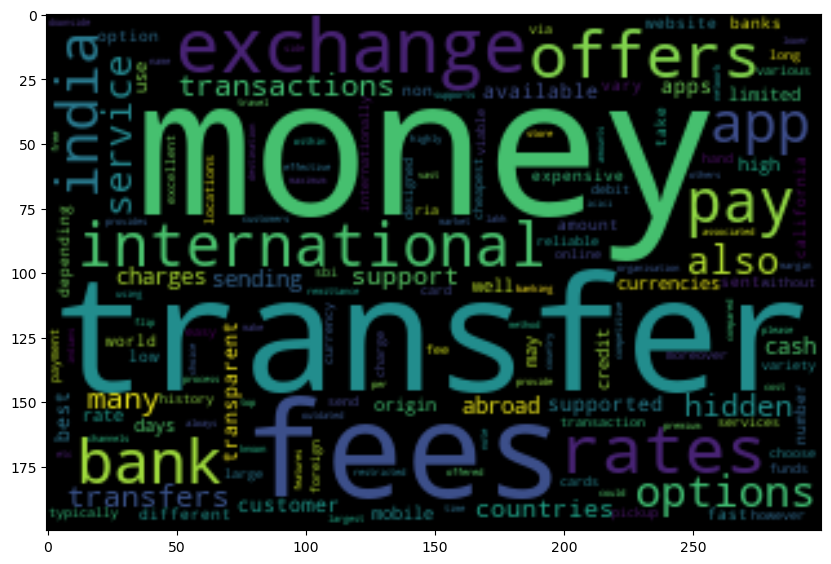

In [12]:
from wordcloud import WordCloud
import wordcloud

wcloud_fig = WordCloud( stopwords = set(wordcloud.STOPWORDS), colormap = 'viridis', width = 300 , height = 200).generate_from_frequencies(freq_dist)

#plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation = 'bilinear')
plt.show()

In [13]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

In [14]:
words_sent = [x.split() for x in data_final]
words_sent
bigram= Phrases(words_sent, min_count=5, threshold=100)
trigram= Phrases(bigram[words_sent], threshold=100)

bigram_phraser= Phraser(bigram)
trigram_phraser= Phraser(trigram)

#bag of words for creating bigram and trigram

bow=[trigram_phraser[bigram_phraser[word]] for word in words_sent]

In [15]:
bow[0:1]

[['march',
  'india',
  'reportedly',
  'sent',
  'million',
  'international',
  'transactions',
  'volume',
  'travel',
  'education',
  'dominated',
  'cause',
  'among',
  'others',
  'world',
  'springs',
  'back',
  'pre',
  'covid',
  'times',
  'banks',
  'money',
  'exchangers',
  'travel',
  'agencies',
  'non',
  'banking',
  'financial',
  'organisations',
  'nbfcs',
  'typically',
  'helped',
  'indians',
  'send',
  'money',
  'abroad',
  'legacy',
  'channels',
  'may',
  'always',
  'prove',
  'reliable',
  'new',
  'age',
  'international',
  'money',
  'transfer',
  'apps',
  'come',
  'picture',
  'swift',
  'easy',
  'use',
  'reliable',
  'safe',
  'cost',
  'effective',
  'best',
  'international',
  'money',
  'transfer',
  'app',
  'market',
  'could',
  'allow',
  'send',
  'money',
  'abroad',
  'without',
  'hassle',
  'article',
  'guide',
  'best',
  'international',
  'money',
  'transfer',
  'app',
  'india',
  'use',
  'comfort',
  'mobile',
  'phone',
 

In [16]:
import spacy
nlp= spacy.load('en_core_web_sm', disable=['parser','ner'])
doc= nlp(' '.join(bow[0]))
for token in doc:
    print(token, '=>', token.pos_)

march => PROPN
india => PROPN
reportedly => ADV
sent => VERB
million => NUM
international => ADJ
transactions => NOUN
volume => NOUN
travel => NOUN
education => NOUN
dominated => VERB
cause => NOUN
among => ADP
others => NOUN
world => NOUN
springs => NOUN
back => ADV
pre => ADJ
covid => ADJ
times => NOUN
banks => NOUN
money => NOUN
exchangers => NOUN
travel => NOUN
agencies => NOUN
non => X
banking => NOUN
financial => ADJ
organisations => NOUN
nbfcs => VERB
typically => ADV
helped => VERB
indians => PROPN
send => VERB
money => NOUN
abroad => ADV
legacy => ADJ
channels => NOUN
may => AUX
always => ADV
prove => VERB
reliable => ADJ
new => ADJ
age => NOUN
international => ADJ
money => NOUN
transfer => NOUN
apps => NOUN
come => VERB
picture => NOUN
swift => ADJ
easy => ADJ
use => NOUN
reliable => ADJ
safe => ADJ
cost => NOUN
effective => ADJ
best => ADJ
international => ADJ
money => NOUN
transfer => NOUN
app => NOUN
market => NOUN
could => AUX
allow => VERB
send => VERB
money => NOUN
abro

In [17]:

def lemmatization(texts, tags=['NOUN','ADJ','VERB','ADV','PROPN']):
    texts_out= []
    for sent in texts:
        doc= nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [18]:
bag_of_words = lemmatization(bow)

In [19]:
#this gives us the keywords
bag_of_words

[['march',
  'india',
  'reportedly',
  'send',
  'international',
  'transaction',
  'volume',
  'travel',
  'education',
  'dominate',
  'cause',
  'other',
  'world',
  'spring',
  'back',
  'pre',
  'covid',
  'time',
  'bank',
  'money',
  'exchanger',
  'travel',
  'agency',
  'banking',
  'financial',
  'organisation',
  'nbfc',
  'typically',
  'help',
  'indians',
  'send',
  'money',
  'abroad',
  'legacy',
  'channel',
  'always',
  'prove',
  'reliable',
  'new',
  'age',
  'international',
  'money',
  'transfer',
  'app',
  'come',
  'picture',
  'swift',
  'easy',
  'use',
  'reliable',
  'safe',
  'cost',
  'effective',
  'good',
  'international',
  'money',
  'transfer',
  'app',
  'market',
  'allow',
  'send',
  'money',
  'abroad',
  'hassle',
  'article',
  'guide',
  'good',
  'international',
  'money',
  'transfer',
  'app',
  'india',
  'use',
  'comfort',
  'mobile',
  'phone',
  'tablet',
  'transfer',
  'money',
  'internationally',
  'online',
  'send',
  

In [20]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)

Dictionary(330 unique tokens: ['able', 'abroad', 'access', 'account', 'accountcustomer']...)
